# Chapter 11: Training Deep Neural Networks

- This is the 2nd chapter of the Part 2 of the book HOML
- Here, we learn about the major problems faced while training DNN, including the vanishing/exploding gradient
- This chapter is mostly theoretical concepts to understand how the problems can be dealt with in multiple ways



# Problems with Training DNN
- Following are a few of the problems that can be faced while training a DNN:
1. **Vanishing or exploding gradient**: 
    - This is when the gradient grows smaller and smaller, or larger and larger, when flowing backwards through the DNN during the training.
    - Both these problems make lower layers very hard to train
1. **Not enough training data**:
    - We may not have enough training data for such large networks or it might be costly to label
1. **Slow Training**:
    - The training might be very slow
1. **Overfitting**:
    - A model with millions of parameters would severely risk overfitting the training set

# Vanishing/Exploding Gradients Problems
- We know that the backpropogation algorithm works by calculating the gradient of the errors for the weights
- Often times, the gradient gets smaller or smaller as the algo progresses down to the lower layers
- As a result, the wights of the lower layers remain unchanged
- This is known as the ***Vanishing Gradient Problem***
- If the opposite happens, then it's called the ***Exploding Gradient Problem***

## Initial Solutions
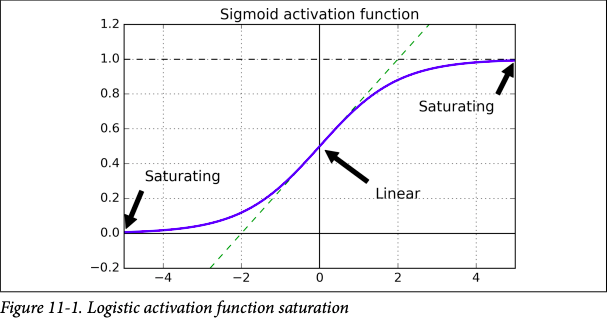
- In 2010, Xavier Glorot and Yoshua Benhio found a few suspects
    - The most popular technique was to use sigmoid function with a weight initialization technique(standard normal distribution)
    - This combination will always end up with the output variance more than the input variance
    - Going forward in the network, the variance increases after each layer until the activation function saturates at the top layer
    - This saturation is actually made worse by the fact that logistic function has a mean of 0.5
- It can be seen that the sigmoid function saturates at 0 or 1 with a derivative extremely close to 0
- Thus, when backprop kicks in, there is virtually no gradient to propogate back through the network

# Fix 1: Good Initialization
## Glorot, LeCurn and He Initialization

- In the paper, they pointed out that the signal needs to flow properly in both directions
    1. Forward direction when making predictions
    1. Backward direction when backpropogating gradients
- They argued that to stabilize the gradient:
    1. **Output variance of EACH LAYER needs to be equal to the variance of its input**
        - When you pass data through a neural network layer, each neuron's output is determined by the weights assigned to its inputs. If the weights are too large, the output variance becomes too high, risking exploding gradients during training. If the weights are too small, the output variance becomes too low, leading to vanishing gradients. Glorot initialization aims to set the weights in a way that the variance of the outputs is similar to the variance of the inputs, maintaining a stable flow of information.
    1. **The gradients need to have equal variance before and after flowing through a layer in the reverse direction**
- Both cannot be guarenteed unless the layer has equal number of inputs and neurons
    - Number of inputs are called ***fan-in*** of the layer
    - Number of neurons are called ***fan-out*** of the layer
    - ***fan-in*** means the number of input connections to a layer
    - ***fan-out*** means the number of neurons in a layer
    - The above statement means that the number of input connections should be equal to the number of neurons in the layer

### Glorot or Xavier Initialization
- Here, we randomly initialize the weights using one of the following strategies when using the logistic activation function:

<span style="color:red">NOTE that,  </span> $f_{avg} = \dfrac{f_{in} + f_{out}}{2}$
1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{1}{fan_{avg}}\\
$$

1. $$
\\
\text{Uniform distribution between } \pm r \\
r = \sqrt{ \dfrac{3}{fan_{avg}} }
$$


#### Example:
- Input layer with 50 neurons ($n_{in} = 50$)
- First hidden layer with 30 neurons ($n_{out_1} = 30$)
- Second hidden layer with 20 neurons ($n_{out_2} = 20$)
- Third hidden layer with 10 neurons ($n_{out_3} = 10$)
- Output layer with 5 neurons

1. **From Input to the first hidden layer**
$$
W_1 \sim \mathcal{N}(0, \dfrac{2}{50+30})
$$
1. **From the first hidden layer to the second hidden layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{30+20})
$$

1. **From the second hidden layer to the third hidden layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{20+10})
$$

1. **From the third hidden layer to the output layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{10+50})
$$

### LeCun Initialization

- Here, we randomly initialize the weights using one of the following strategies when using the logistic activation function:

1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{1}{fan_{in}}\\
$$

1. $$
\\
\text{Uniform distribution between } \pm r \\
\\
r = \sqrt{ \dfrac{3}{fan_{in}} }
$$


- LeCun initialization is equal to Glorot/Xavier initialization when $fan_{in} = fan_{out}$

### He Initialization
1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{2}{fan_{in}}\\
$$


## Summary
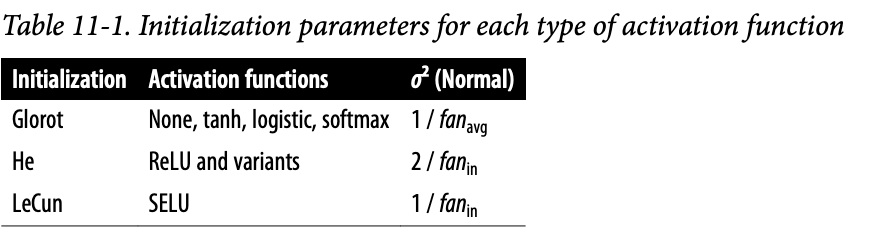

## Good Initializations in Keras

- By default, keras uses Glorot Initialization with uniform distribution


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 

2024-01-04 23:21:19.565440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# To use HE Initialization with normal distribution
he_normal_layer = keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

# To use HE Initialization with uniform distribution
he_uniform_layer = keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform')

In [10]:
he_normal_layer.kernel_initializer

In [11]:
he_uniform_layer.kernel_initializer

In [14]:
# To use Glorot/Xavier initialization with normal distribution
glorot_normal_layer = keras.layers.Dense(10, activation='sigmoid', kernel_initializer='glorot_normal')

- To use He initialization with a uniform distribution but based on $f_{avg}$ instead of $f_{in}$, we can use the VarianceScaling initializer like this:

In [16]:
# We can play with the parameters here
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
he_avg_layer = keras.layers.Dense(10, activation='relu', kernel_initializer=he_avg_init)

In [17]:
he_avg_layer.kernel_initializer

# Fix 2: Good Activation Functions
- Activation functions which are non-saturating
- Biological NN uses sigmoid like function
    - Not the best choice for ANN, due to the saturating nature

## ReLU
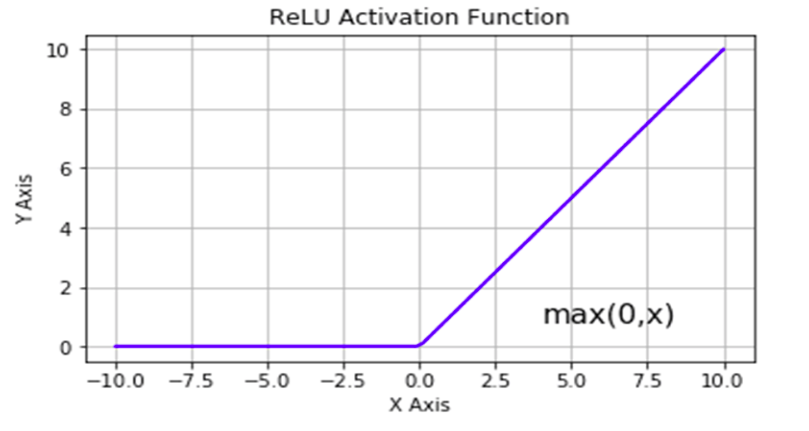
- Rectified Linear Unit
- A much better choice as it doesn't saturate for positive values
- BUT, IT'S NOT PERFECT
- Suffers from the problem of ***dying ReLU***
    - During training, some neurons "die"
    - Meaning, they stop outputting anything other than a $0$
    - In some cases, we may find that half of your network's neurons are dead, especially if we use large learning rate
    - A neuron dies when the weights get tweaked in a way that the weighted sum of its input are negative for all instances in the training set
    - In this case, the gradient for the ReLU would be 0 when the input is negative
    - And therefore, the gradient descent does not affect the neuron
- A dead neuron may come back to life if it's in the first hidden layer
- Let's look at a few varients of ReLU

### Leaky ReLU
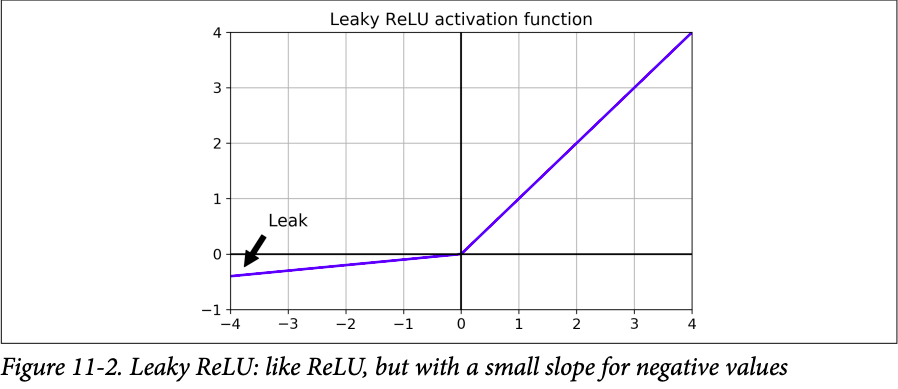
- To solve the problem of dying ReLU, we have a variant of ReLU known as the ***Leaky ReLU***
- Leaky ReLU is defined as:$$
LeakyReLU_\alpha(z) = \max(\alpha z, z)
$$
- The HP $\alpha$ defines how much the function "leaks"
    - Typically set to $0.01$
- This ensures that the leaky ReLU's never die. They can go into a long comma but they might wake up

- **Leaky ReLU** >> **Strict ReLU**
- At times, the leak set to 0.2(huge leak) might perform better than 0.01(small leak)

### RRELU
- Randomized **Leaky** Rectified Linear Units
- $\alpha$ is picked randomly in a given range during training and is fixed to tan avg value during the testing
- Better than ReLU
- Acts as a regularizer
    - Avoids the risk of overfitting

### PReLU
- Parametric Leaky ReLU
- $\alpha$ is authorized to be learned during training, modified during the backpropogation.
- PReLU strongly ooutperforms ReLU on large image datasets
- On small datasets, it might overfit


## ELU
- Exponential Linear Unit
- Introduced in 2015
- In the published paper, it outperformed all the varients of ReLU
    - Training time was reduced
    - Performed better on the test set

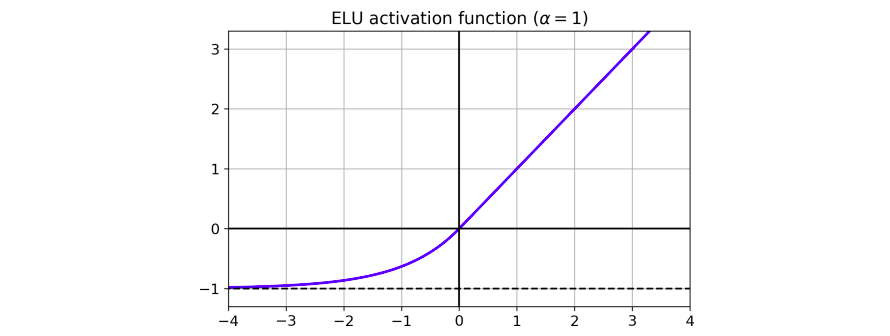
$$
ELU_{\alpha}(z) =\begin{cases}
\alpha ( \ exp\ ( z) -1) & \mathrm{if,} \ z< 0\\
z & \mathrm{if,} \ z\geqslant 0
\end{cases}
$$

- Looks like ReLU but with few major differences:
    1. It takes on negative values when z < 0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter.
    1. It has a nonzero gradient for z < 0, which avoids the dead neurons problem
    1. If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

- Main drawback of ELU is that it is slower to compute than the ReLU function and its variants
    - Due to the use of the exponential function
- Its faster convergence rate during traianing compensates for the slow computation
    - But still, at times, ELU network will be slower than ReLU network

## SELU
- Scaled ELU
- Introduced in 2017
- If all the hidden layers use SELU, the network will ***self-normalize***
    - This means that the output of each layer will tend to preserve mean 0, var 1 during training
    - This solves the vanishing/exploding gradient problem
- As a result, ***SELU*** activation function outperforms any other activation function

### Conditions for Self-Normalization to happen
1. Input features must be standardized
1. Every hidden layers' weights must be initialized using LeCun Normal initialization
    - In keras, set ```kernel_initializer="lecun_normal"```
1. Network's arch must be sequential.
    - If we try to use SELU with non-sequential networks which skip connections(wide-and-deep NN, RNN, etc), self-normalization will not be guaranteed!!
        - So, SELU might not outperform other activation functions

## Summary
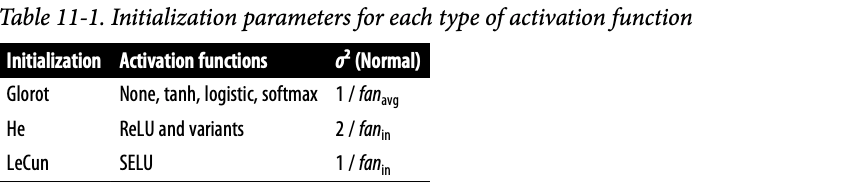

- In general, follow the sequence:
    - **SELU > ELU > Leaky ReLU (and variants) > ReLU > tanh > logistic**

- If self-normalization is prevented by the network, try **ELU**
    - Might outperform SELU as SELU is not smooth at z=0

- If you care a lot about runtime latency, try **Leaky ReLU**

- If spead is the priority, **ReLU** might be the best choice

## Using it in Keras
- To use Leaky ReLU in keras, create a LeakyReLU layer and add it to the model just AFTER the layer you want to apply it to


In [21]:
# LEAKY ReLU

model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2), # After the hidden layer 1
    keras.layers.Dense(20, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2), # After the hidden layer 2
    keras.layers.Dense(1)
    
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                270       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                620       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Parametric ReLU

model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, kernel_initializer='he_normal'),
    keras.layers.PReLU(), # After the hidden layer 1
    keras.layers.Dense(20, kernel_initializer='he_normal'),
    keras.layers.PReLU(), # After the hidden layer 2
    keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                270       
                                                                 
 p_re_lu (PReLU)             (None, 30)                30        
                                                                 
 dense_15 (Dense)            (None, 20)                620       
                                                                 
 p_re_lu_1 (PReLU)           (None, 20)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [24]:
# SELU
# Set activation to selu with lecun_normal kernel initializer
model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(20, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 30)                270       
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


# FIX 3: Batch Normalization
- He initialization + ELU (or any ReLU variant) helps a lot with the vanishing gradient problem at the beginning of the training
    - But, it does not guarantee that they wont come back during training
- BN was introduced in 2015 to address the problem
- How the technique works is by adding an operation in the model just BEFORE or AFTER the activation function of each of the hidden layer
- The operation simply zero-centers and normalizes each input and then scales and shifts the result using two new parameter vectors per layer
    1. One for scaling
    1. Other for shifting
- In other words, the operation lets the model learn the optimal scale and mean of each ofthe layer's input
- In many cases, if you add a BN layer as the very first layer of your NN, you don't need to standardize your training set(like, using StandardScaler)
    - The BN layer will do it for you
    - But, approximately, since it only looks at one batch at a time
    
- In order to zero-center and normalize the inputs, the algorithm needs to estimate each input's mean and standard deviation. 
    - It does so by evaluating the mean and standard deviation of the input over the current mini-batch
    
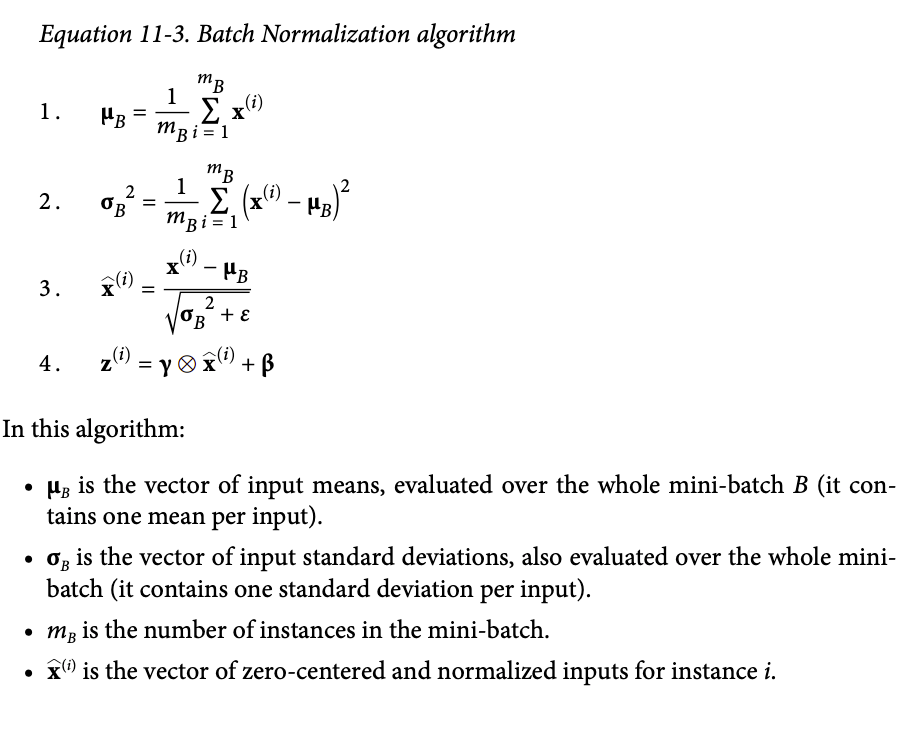
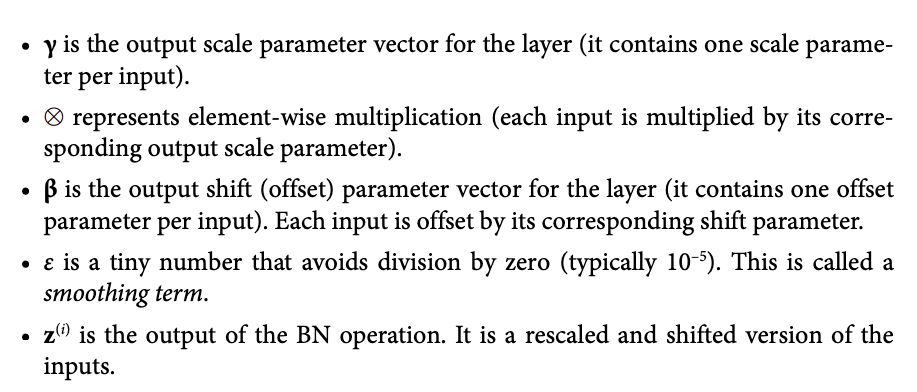

## BN parameters for testing
- During testing, we wouldn't have a batch to estimate the parameters
- One solution is to wait till the end of the training, then run the entire training set through the NN and compute the mean and SD of each input of the BN layer
- These final mean and SD can be used duringthe prediction
- However, most implementations of BN estimate these final params during training using a **moving average** of the layer's input means and SD
- Keras does this automatically as well

## Summary
- In summary, 4 parameter vectors are learned during the training:
    1. $\pmb{\gamma}$: output scale vector
        - Learned through regular backpropogation
    1. $\pmb{\beta}$: output offset vector
        - Learned through regular backpropogation
    1. $\pmb{\mu}$: Input mean vector
        - Learned through exponential moving average
    1. $\pmb{\sigma}$: Input SD vector
        - Learned through exponential moving average


## Other features of BN
- Acts as a regularizer
- Reduces vanishing gradient so much that we can also use saturating activation functions like tanh, sigmoid
- Can use large learning rate to speed up the learning process significantly

## Few points to keep in mind about BN
- Adds complexity to the model
- Adds a runtime penalty
    - Slower predictions due to extra computations at each layer
- Fortunately, it is possible to fuse the BN layer with the previous layer, after the training, thereby avoiding the runtime penalty
    - To do so, calculate a new weight vector as follows:

$$
{ W' = \dfrac{\gamma \otimes W}{\sigma} }
\\
$$
and we can calculate bias vector as following:
$$
{ b' = \dfrac{\gamma \otimes (b-\mu)}{\sigma + \beta} }
$$
This simplifies the equation as:
$$
XW' + b'
$$

## BN in Keras

- Just add a BN layer before or after each of the hidden layer's ACTIVATION FUNCTION
- Mostly can use the default HPs
- May need to tweak the ```momentum```
    - A good momentum is close to 1: 0.9, 0.99, etc


In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # BN layer after input; normalizes the input
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), # BN layer after hidden layer 1
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),# BN layer after hidden layer 2
    keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

- 4 params per input, $\gamma, \beta, \mu, \sigma$:
    - $4\times 784 = 3136$
- Last 2 params are moving averages, so Keras call them "Non-trainable"
    - $(3136+1200+400)/2 = 2368$

In [28]:
# Looking at the variables in the first layer

[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

- Authors of the BN paper argue that we should add the BN layer before the activation, as supposed to how we did just now

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # BN layer after input; normalizes the input
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), # BN layer after hidden layer 1, before activation
    keras.layers.Activation('elu'), # Activation after the BN
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),# BN layer after hidden layer 2, before activation
    keras.layers.Activation('elu'), # Activation after the BN
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_29 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_13 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 300)               0         
                                                                 
 dense_30 (Dense)            (None, 100)              

- Since the BN layer has an offset param per input, we can remove the bias terms from the previous layers
- just use like this:
```python
...
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
...
```


# Fix 4: Gradient Clipping
- Clip the gradient during backpropogation so that it doesn't exceed a set threshold
- Most often used in RNN as BN is tricky with RNNs

## Implementing in Keras
- SImply set ```clipvalue``` or ```clipnorm``` arguments when creating an optimizer

In [35]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer

- The optimizer will clip each and every value between $\pm 1$
- This may change the orientation of the gradient vector
    - Example: $[0.9, 100.0] \rightarrow [0.9, 1.0]$
- That's why we should use ```clipnorm``` argument
    - Clips the gradient if its $\ell_2$ norm is greater than the threshold
    - Example: $[0.9, 100.0] \rightarrow [0.00899, 0.9999]$ for ```clipnorm=1.0```


# Fix 5: Re-Using Pretrained Layers
- In general, not a good idea to train large DNN from scratch
- Can use the weights from DNNs that were trained for a similar task
    - Will learn in chapter 14, how to find such models
- Reuse lower layers of the network which accomplishes a similar task
- This is known as ***transfer learning***
- Speeds up training, requires less training data as well

***Example:***
- You have a model that can classify pictures into 100 different categories including animals, plants, vehicles, and everyday objects
- You now want to train a DNN to classify specific types of vehicles
- These tasks are very much similar, even partly overlapping

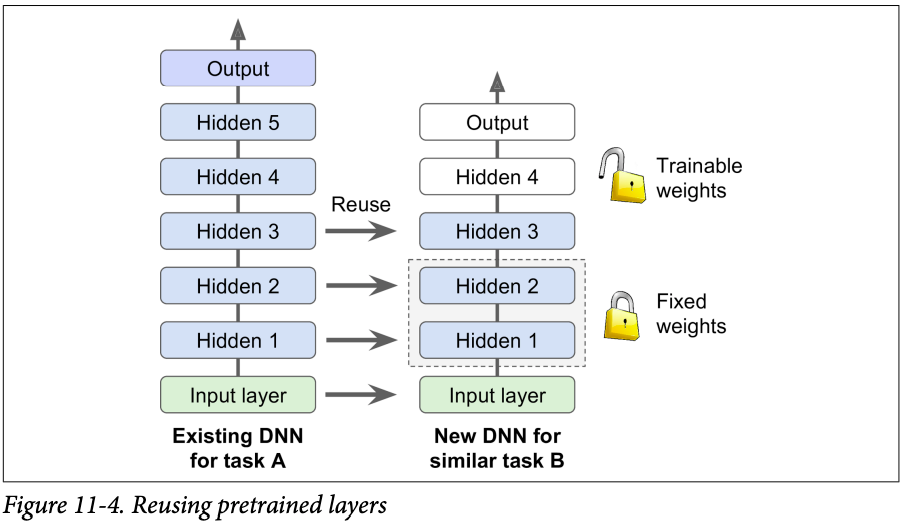

> If the input pictures of your new task don’t have the same size as the ones used in the original task, you will usually have to add a preprocessing step to resize them to the size expected by the original model. More generally, transfer learning will work best when the inputs have similar low-level features.

> More similar the tasks are, more layers you can reuse, starting with the lowest layers

> For very similar tasks, try using all hidden layers and just replacing the output layer

***
- Try freezing all the reused layers first, then train your model and see how it performs
- Then try unfreezing one or two layers at a time from the top and then train
- Repeat

- If it still doesn't give a good performance, try dropping the top hidden layers and then freeze everything again
- Iterate until you reach a good performance
***


## Transfer Learning with Keras

- Say you have a model_A from which you can use the layers in a new model, model_B
- Follow the following python code:

In [38]:
model_A = model # Or load a model using keras.models.load_model()

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

In [39]:
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

- NOTE THAT, you cannot merge the 2 steps using the list method for layers
- You need to add the other layers later on, once you have added the layers to reuse
- ALSO, when you train model_B_on_A, it will also affect the model_A
    - To avoid this, we need to clone the model_A before reusing the layers

In [41]:
model_A_clone = keras.models.clone_model(model_A) # Cloning the model

model_A_clone.set_weights(model_A.get_weights()) # Reusing the weights because cloning doesn't copy that

In [42]:
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))


- Now, we need to freeze the layers
> NOTE THAT, after freezing and unfreezing any layers in a model, we need to re-compile the model to use

In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [45]:
model_B_on_A.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

### Something's Fishy

- This method gave good results in this case, as per the books
- BUT, this trick does not actually help much and often downgrades the performance
- It turns out that Transfer Learning doesn't work very well with small dense networks
- It works best with CNN models

## Unsupervised Pretraining
- When tackling a complex problem but not enough data to train
- Often easy to gather unlabelled data and then labelling them is expensive
- Train an ensupervised model on the unlabelled data: like autoencoders or GAN
- Then, re-use the lower layers of the autoencoder or GAN's discriminator
    - Add the output layer and fine-tune the final model using supervised learning with the labelled examples
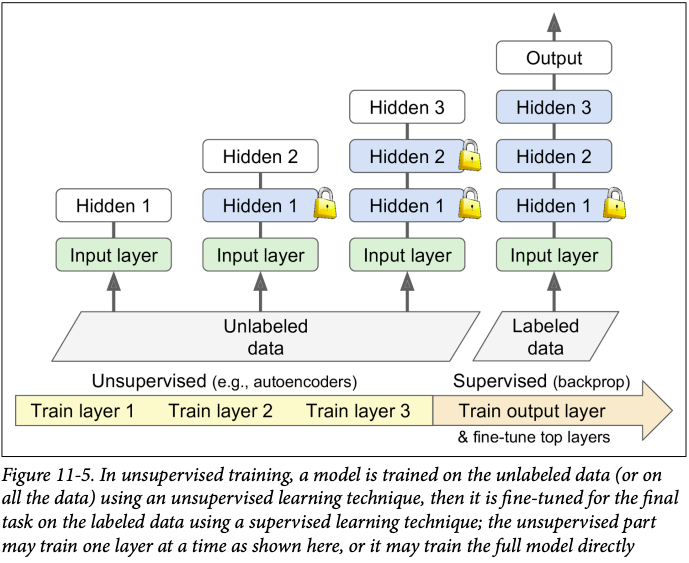
- A technique known as the ***greedy layer-wise pretraining*** (above figure) was used earlier
    - Train unsupervised model with 1 layer, typically an RBM(restricted Boltzmann Machine)
    - Freeze the layer
    - Train again with 2 layers
    - Freeze both the layers
    - Train again witha 3rd layer
    - Repeat
- Now, we can train the entire model at once, that too using autoencoders and GANs


## Pretraining on an Auxilary Task
- When limited labelled data, another way is to train an aux task NN for which we can get the data easily. Then, reuse the lower layers for the actual task

***Example***
- You want to build a model to recognize faces
- Data is limited
- Train an aux task to detect if two different pictures feature the same person or not
- Use the lower layers to build the main model
***
- Useful in NLP
